<a href="https://colab.research.google.com/github/ryanhassell/DBMS/blob/main/Assignment4/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ryan Hassell

Here is the query I used to create my tables:



```
CREATE TABLE country (
   country_id INT NOT NULL PRIMARY KEY,
   country    VARCHAR(255) NOT NULL
);

CREATE TABLE city (
   city_id    INT NOT NULL PRIMARY KEY,
   city       VARCHAR(255) NOT NULL,
   country_id INT NOT NULL,
   FOREIGN KEY (country_id) REFERENCES country(country_id)
);

CREATE TABLE address (
   address_id  INT NOT NULL PRIMARY KEY,
   address     VARCHAR(255) NOT NULL,
   address2    VARCHAR(255),
   district    VARCHAR(255),
   city_id     INT NOT NULL,
   postal_code INT,
   phone       INT,
   FOREIGN KEY (city_id) REFERENCES city(city_id)
);

CREATE TABLE staff (
   staff_id   INT NOT NULL PRIMARY KEY,
   first_name VARCHAR(255) NOT NULL,
   last_name  VARCHAR(255) NOT NULL,
   address_id INT NOT NULL,
   email      VARCHAR(255) NOT NULL,
   store_id   INT NOT NULL,
   active     BIT NOT NULL,
   username   VARCHAR(255) NOT NULL,
   password   VARCHAR(255) NOT NULL,
   FOREIGN KEY (address_id) REFERENCES address(address_id)
);

CREATE TABLE store (
   store_id   INT NOT NULL PRIMARY KEY,
   address_id INT NOT NULL,
   FOREIGN KEY (address_id) REFERENCES address(address_id)
);

CREATE TABLE actor (
   actor_id   INT NOT NULL PRIMARY KEY,
   first_name VARCHAR(255) NOT NULL,
   last_name  VARCHAR(255) NOT NULL
);

CREATE TABLE category (
   category_id INT NOT NULL PRIMARY KEY,
   name        VARCHAR(255) NOT NULL
);

CREATE TABLE customer (
   customer_id INT NOT NULL PRIMARY KEY,
   store_id    INT NOT NULL,
   first_name  VARCHAR(255) NOT NULL,
   last_name   VARCHAR(255) NOT NULL,
   email       VARCHAR(255) NOT NULL,
   address_id  INT NOT NULL,
   active      BIT NOT NULL,
   FOREIGN KEY (store_id) REFERENCES store(store_id),
   FOREIGN KEY (address_id) REFERENCES address(address_id)
);

CREATE TABLE film (
   film_id          INT NOT NULL PRIMARY KEY,
   title            VARCHAR(255) NOT NULL,
   description      VARCHAR(255) NOT NULL,
   release_year     INT NOT NULL,
   language_id      INT NOT NULL,
   rental_duration  INT NOT NULL,
   rental_rate      NUMERIC(4,2) NOT NULL,
   length           INT NOT NULL,
   replacement_cost NUMERIC(5,2) NOT NULL,
   rating           VARCHAR(255) NOT NULL,
   special_features VARCHAR(255) NOT NULL
);

CREATE TABLE film_actor (
   actor_id INT NOT NULL,
   film_id  INT NOT NULL,
   PRIMARY KEY (actor_id, film_id),
   FOREIGN KEY (actor_id) REFERENCES actor(actor_id),
   FOREIGN KEY (film_id) REFERENCES film(film_id)
);

CREATE TABLE film_category (
   film_id     INT NOT NULL,
   category_id INT NOT NULL,
   PRIMARY KEY (film_id, category_id),
   FOREIGN KEY (film_id) REFERENCES film(film_id),
   FOREIGN KEY (category_id) REFERENCES category(category_id)
);

CREATE TABLE inventory (
   inventory_id INT NOT NULL PRIMARY KEY,
   film_id      INT NOT NULL,
   store_id     INT NOT NULL,
   FOREIGN KEY (film_id) REFERENCES film(film_id),
   FOREIGN KEY (store_id) REFERENCES store(store_id)
);

CREATE TABLE language (
   language_id INT NOT NULL PRIMARY KEY,
   name        VARCHAR(255) NOT NULL
);

CREATE TABLE payment (
   payment_id   INT NOT NULL PRIMARY KEY,
   customer_id  INT NOT NULL,
   staff_id     INT NOT NULL,
   rental_id    INT NOT NULL,
   amount       NUMERIC(5,2) NOT NULL,
   payment_date VARCHAR(255) NOT NULL,
   FOREIGN KEY (customer_id) REFERENCES customer(customer_id),
   FOREIGN KEY (staff_id) REFERENCES staff(staff_id)
);

CREATE TABLE rental (
   rental_id   INT NOT NULL PRIMARY KEY,
   rental_date VARCHAR(255) NOT NULL,
   inventory_id INT NOT NULL,
   customer_id INT NOT NULL,
   return_date VARCHAR(255),
   staff_id INT NOT NULL,
   FOREIGN KEY (inventory_id) REFERENCES inventory(inventory_id),
   FOREIGN KEY (customer_id) REFERENCES customer(customer_id),
   FOREIGN KEY (staff_id) REFERENCES staff(staff_id)
);

```



## Constraints

Here are my tables, with their respective primary keys and foreign keys:

(My laptop screen could not fit the whole ER model in one picture, so here is a top and bottom, my apologies!)

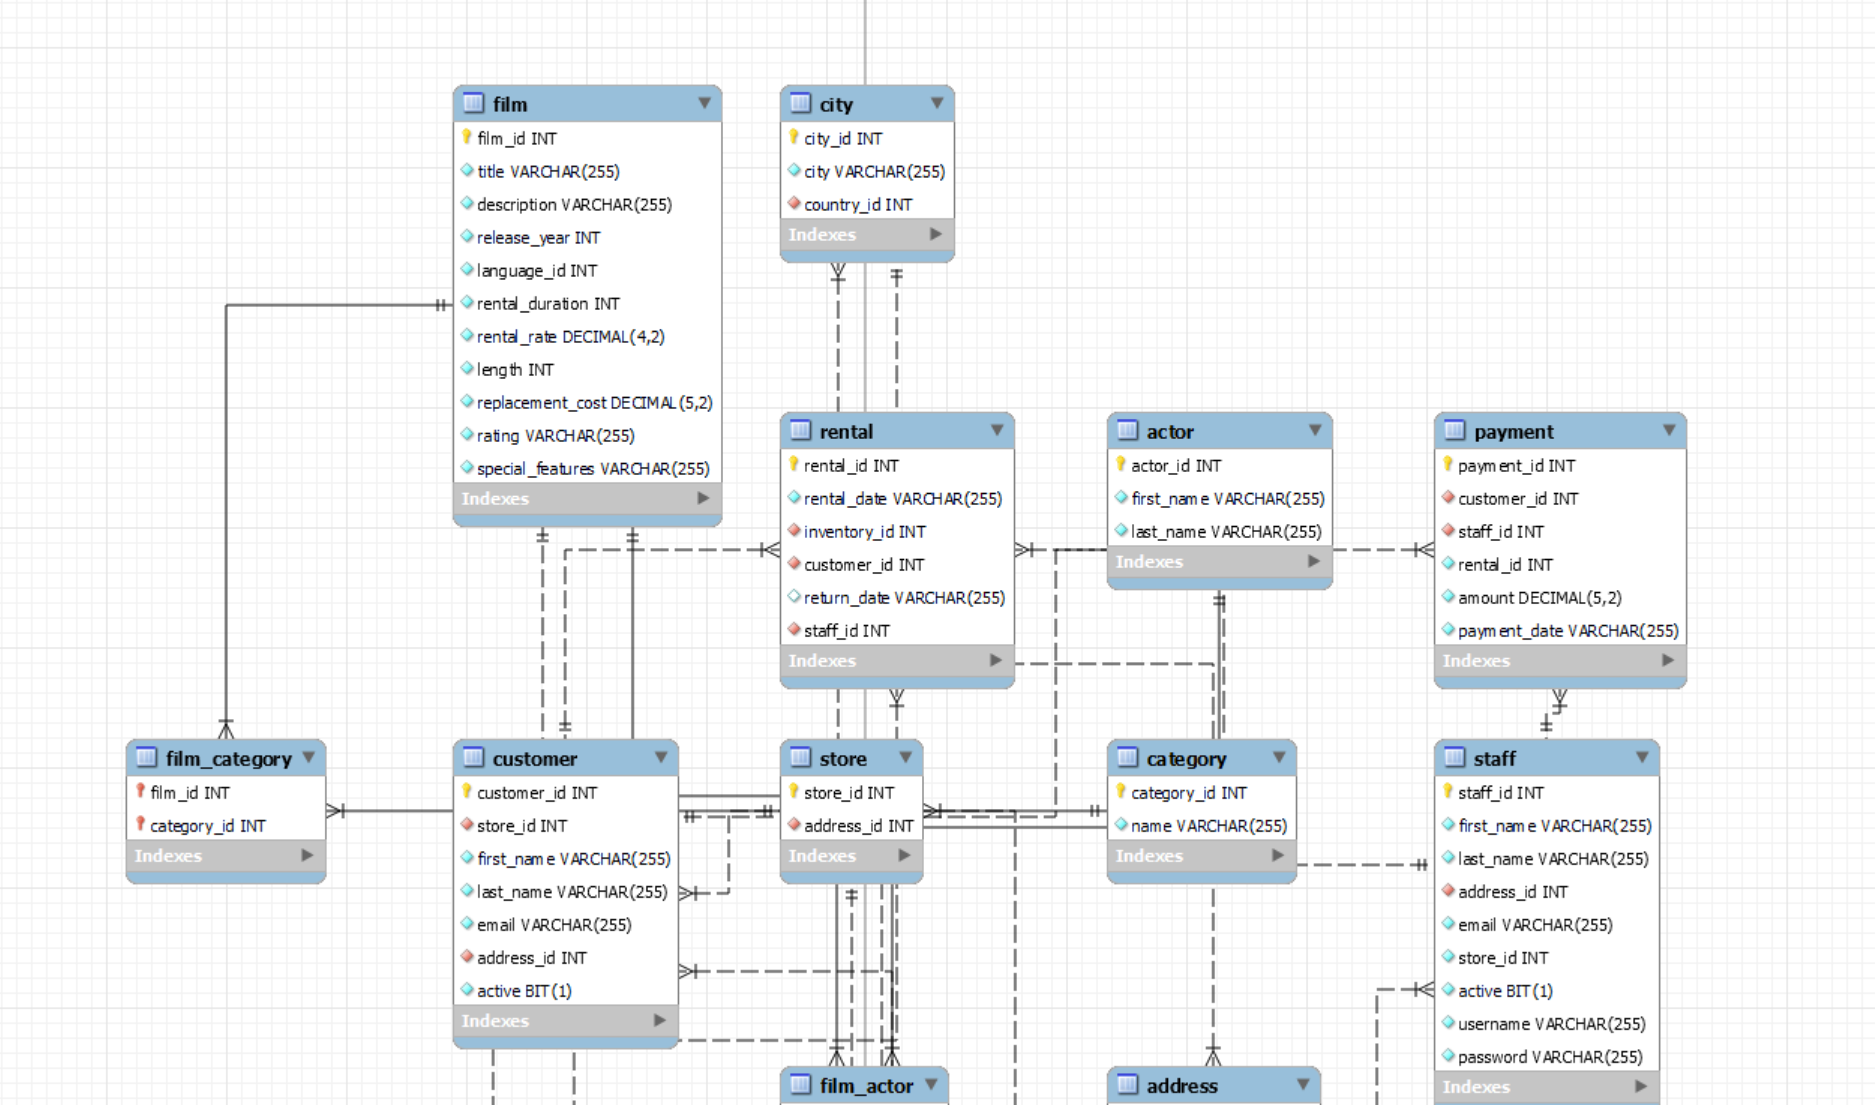
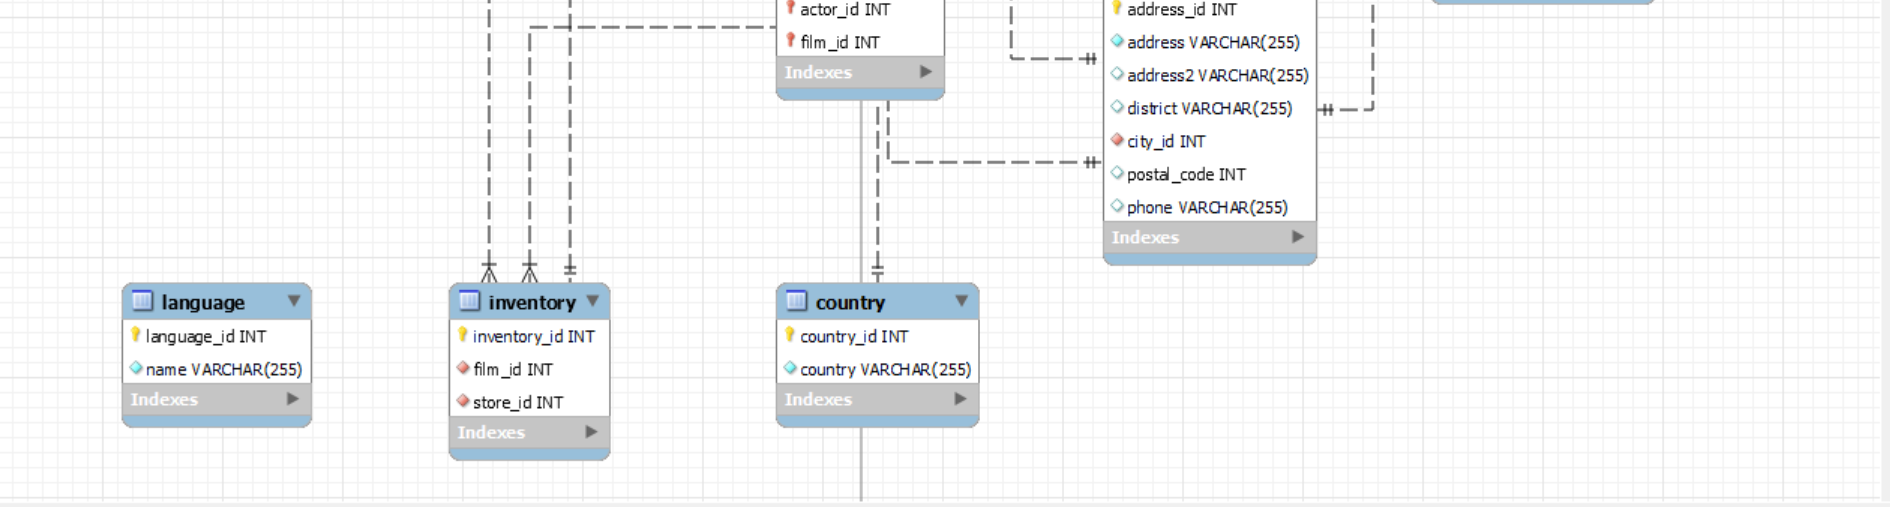

I have also included the file of my model in the Assignment4 Folder in my github repo.

In order to create the constraint that specified that Category names come from the set {Animation, Comedy, Family, Foreign, Sci-Fi, Travel, Children, Drama, Horror, Action, Classics, Games, New, Documentary, Sports, Music}, I used the constraint:

```
ALTER TABLE category ADD CONSTRAINT check_category_name CHECK (name IN ('Animation', 'Comedy', 'Family', 'Foreign', 'Sci-Fi', 'Travel', 'Children', 'Drama', 'Horror', 'Action', 'Classics', 'Games', 'New', 'Documentary', 'Sports', 'Music'));

```

In order to create the constraint that specified that A film’s special_features attribute comes from the set {Behind the Scenes, Commentaries, Deleted Scenes, Trailers}, I used the constraint:

```
ALTER TABLE film ADD CONSTRAINT check_special_features CHECK (special_features IN ('Behind the Scenes', 'Commentaries', 'Deleted Scenes', 'Trailers'));
```

In order to create the constraint that specified that all dates must be valid (Hint: you may use the date() function)
, I used the constraint:

```
ALTER TABLE film ADD CONSTRAINT check_release_year CHECK (DATE(CONCAT(release_year, '-01-01')) IS NOT NULL);
```



In order to create the constraint that specified that active must be from the set {0,1} where 1 means active and 0 inactive
, I used the constraint:
```
ALTER TABLE customer ADD CONSTRAINT check_active CHECK (active IN (0, 1));
```

In order to create the constraint that specified that rental duration must be a positive number of days between 2 and 8
, I used the constraint:
```
ALTER TABLE film ADD CONSTRAINT check_rental_duration CHECK (rental_duration BETWEEN 2 AND 8);
```

In order to create the constraint that specified that rental rate per day must be between 0.99 and 6.99, I used the constraint:
```
ALTER TABLE film ADD CONSTRAINT check_rental_rate CHECK (rental_rate BETWEEN 0.99 AND 6.99);
```

In order to create the constraint that specified that film length must be between 30 and 200 minutes, I used the constraint:
```
ALTER TABLE film ADD CONSTRAINT check_film_length CHECK (length BETWEEN 30 AND 200);
```

In order to create the constraint that specified that ratings are the values PG, G, NC-17, PG-13, or R, I used the constraint:
```
ALTER TABLE film ADD CONSTRAINT check_rating CHECK (rating IN ('PG', 'G', 'NC-17', 'PG-13', 'R'));
```

In order to create the constraint that specified that ratings are the values PG, G, NC-17, PG-13, or R, I used the constraint:
```
ALTER TABLE film ADD CONSTRAINT check_rating CHECK (rating IN ('PG', 'G', 'NC-17', 'PG-13', 'R'));
```

In order to create the constraint that specified that replacement cost is between 5.00 and 100.00, I used the constraint:
```
ALTER TABLE film ADD CONSTRAINT check_replacement_cost CHECK (replacement_cost BETWEEN 5.00 AND 100.00);
```

In order to create the constraint that specified that amount should be >= 0, I used the constraint:
```
ALTER TABLE payment ADD CONSTRAINT check_amount CHECK (amount >= 0);
```

#Queries

What is the average length of films in each category? List the results in alphabetic order of categories.


```
SELECT category.name AS category_name, AVG(film.length) AS average_length
FROM film_category
INNER JOIN film ON film_category.film_id = film.film_id
INNER JOIN category ON film_category.category_id = category.category_id
GROUP BY category.name
ORDER BY category.name;
```

Here is a picture of my results:

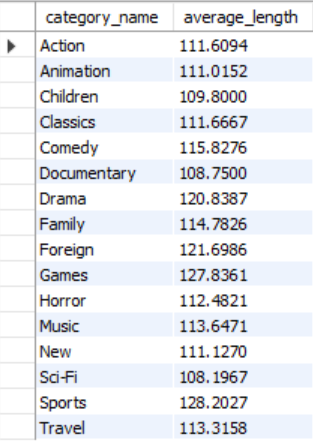

Which categories have the longest and shortest average film lengths?

```
WITH CategoryAvgLength AS (
    SELECT category.name AS category_name, AVG(film.length) AS avg_length
    FROM category
    LEFT JOIN film_category ON category.category_id = film_category.category_id
    LEFT JOIN film ON film_category.film_id = film.film_id
    GROUP BY category_name
)
SELECT category_name, avg_length
FROM CategoryAvgLength
WHERE avg_length = (SELECT MAX(avg_length) FROM CategoryAvgLength)
   OR avg_length = (SELECT MIN(avg_length) FROM CategoryAvgLength);
```
Here is a screenshot of my results:

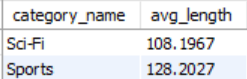

Which customers have rented action but not comedy or classic movies?
```
SELECT DISTINCT customer.customer_id, customer.first_name, customer.last_name
FROM customer
JOIN rental ON customer.customer_id = rental.customer_id
JOIN inventory ON rental.inventory_id = inventory.inventory_id
JOIN film ON inventory.film_id = film.film_id
JOIN film_category ON film.film_id = film_category.film_id
JOIN category ON film_category.category_id = category.category_id
WHERE category.name = 'Action'
AND customer.customer_id NOT IN (
    SELECT DISTINCT customer2.customer_id
    FROM customer AS customer2
    JOIN rental AS rental2 ON customer2.customer_id = rental2.customer_id
    JOIN inventory AS inventory2 ON rental2.inventory_id = inventory2.inventory_id
    JOIN film AS film2 ON inventory2.film_id = film2.film_id
    JOIN film_category AS film_category2 ON film2.film_id = film_category2.film_id
    JOIN category AS category2 ON film_category2.category_id = category2.category_id
    WHERE category2.name IN ('Comedy', 'Classics')
);
```

Here is a screenshot of my results:

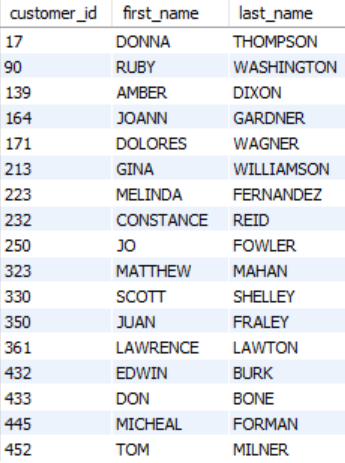

Which actor has appeared in the most English-language movies?
```
SELECT actor.actor_id, actor.first_name, actor.last_name, COUNT(*) AS movie_count
FROM actor
JOIN film_actor ON actor.actor_id = film_actor.actor_id
JOIN film ON film_actor.film_id = film.film_id
JOIN language ON film.language_id = language.language_id
WHERE language.name = 'English'
GROUP BY actor.actor_id
ORDER BY movie_count DESC
LIMIT 1;
```
And here is a screenshot of my results:

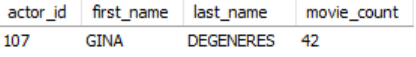

How many distinct movies were rented for exactly 10 days from the store where Mike works?
```
SELECT COUNT(DISTINCT rental.inventory_id) AS distinct_movie_count
FROM rental
JOIN staff ON rental.staff_id = staff.staff_id
WHERE rental.return_date = DATE_ADD(rental.rental_date, INTERVAL 10 DAY)
AND staff.first_name = 'Mike';
```
Screenshot of my results:

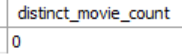

Alphabetically list actors who appeared in the movie with the largest cast of actors.

```
WITH ActorMovieCast AS (
    SELECT f.film_id, a.actor_id, a.first_name, a.last_name
    FROM film f
    JOIN film_actor fa ON f.film_id = fa.film_id
    JOIN actor a ON fa.actor_id = a.actor_id
)
SELECT amc.actor_id, amc.first_name, amc.last_name
FROM ActorMovieCast amc
WHERE amc.film_id = (
    SELECT film_id
    FROM (
        SELECT film_id, COUNT(actor_id) AS cast_count
        FROM film_actor
        GROUP BY film_id
        ORDER BY cast_count DESC
        LIMIT 1
    ) AS largest_cast
)
ORDER BY amc.first_name, amc.last_name;

```
Screenshot of my results:

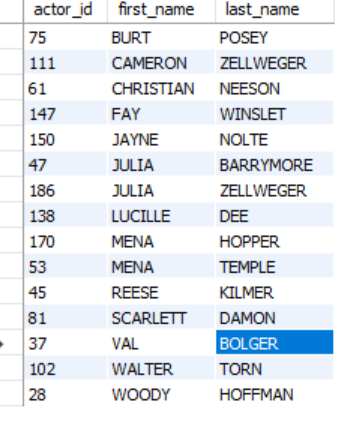